## Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [10]:
df = pd.read_csv("./Sampling/Climbers.csv", sep=";")

#### Canviem el nom de les columnes per fer la manipulació més fàcilment

In [11]:
df.columns = ['Timestamp', 'Sex', 'Height', 'Weight', 'Arm_span','Time_climbing', 'Indoor_vs_outdoor',
              'Hardest_V_Grade_ever','Hardest_V_Grade_last3months','V_Grade_sent_90perc_routes',
              'Hardest_Ewbank_Grade_ever','Hardest_Ewbank_Grade_last3months','Ewbank_Grade_sent_90perc_routes',
              'Freq_climbing_sessions_w','Avg_hours_climbing_w','Avg_hours_training_for_climbing_w',
              'Freq_Hangboard_w', 'Hangboard_grips_used','Style_Hangboard','Max_Weight_Hangboard_18mm_Half_crimp',
              'Max_Weight_Hangboard_18mm_Open_crimp','Min_Edge_mm,kg_Half_crimp','Min_Edge_mm,kg_Open_crimp',
              'Freq_CampusBoard_w', 'Time_CampusBoard_h','Freq_Endurance_session_w','Endurance_training', 
              'Freq_General_Strength_Training_w','Time_General_Strength_Training_h','Type_StrengthTraining', 
              'Other_activities','Max_PullUp_reps', 'Max_weighted_PullUps_5rep', 'Max_PushUp_reps',
              'Max_L-sit_time']

#### Convertim les columnes objecte a nombre

In [12]:
df['Sex'] = df['Sex'].astype('category').cat.codes # 0 = Female, 1 = Male
df.Height = pd.to_numeric(df.Height, errors='coerce')
df.Weight = pd.to_numeric(df.Weight, errors='coerce')
df.Arm_span = pd.to_numeric(df.Arm_span, errors='coerce')
df.Hardest_Ewbank_Grade_ever = pd.to_numeric(df.Hardest_Ewbank_Grade_ever, errors='coerce')
df.Hardest_Ewbank_Grade_last3months = pd.to_numeric(df.Hardest_Ewbank_Grade_last3months, errors='coerce')
df.Ewbank_Grade_sent_90perc_routes = pd.to_numeric(df.Ewbank_Grade_sent_90perc_routes, errors='coerce')

In [13]:
def createTime(time):
    start = time.find("- ") + len("- ")
    end = time.find(" years")
    substring = time[start:end]
    return int(math.ceil(float(substring)))

In [14]:
df['Time_climbing'] = df['Time_climbing'].replace('More than 15 years', '- 15 years')
df['Time_climbing'] = df['Time_climbing'].apply(lambda x: createTime(x))

#### Seleccionem les columnes numèriques únicament

In [15]:
df_no_object = df.select_dtypes(exclude=['object'])
df_no_object = df_no_object.dropna()

In [51]:
df_no_object

,Sex,Height,Weight,Arm_span,Time_climbing,Hardest_Ewbank_Grade_ever,Hardest_Ewbank_Grade_last3months,Ewbank_Grade_sent_90perc_routes,Freq_climbing_sessions_w,Avg_hours_climbing_w,Avg_hours_training_for_climbing_w,Freq_Hangboard_w,Freq_CampusBoard_w,Time_CampusBoard_h,Freq_Endurance_session_w,Freq_General_Strength_Training_w,Time_General_Strength_Training_h
2,1,178.0,67.0,175.0,1,21.0,21.0,19.0,3,4,3,2,0,0,2,3,2
3,1,173.0,70.0,178.0,10,21.0,21.0,18.0,2,6,1,1,0,0,1,0,0
7,1,186.0,88.0,192.0,2,23.0,22.0,21.0,3,8,8,1,0,0,2,3,4
8,1,185.0,60.0,180.0,1,21.0,21.0,18.0,1,3,1,0,0,0,0,1,1
10,1,178.0,81.6,178.0,6,25.0,23.0,21.0,2,4,0,1,0,0,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,1,172.0,82.5,191.7,3,22.0,22.0,19.0,2,4,2,1,0,0,0,5,10
585,1,165.0,63.0,165.0,9,31.0,31.0,30.0,4,12,4,1,1,1,0,1,1
586,1,164.0,68.0,164.0,5,29.0,29.0,25.0,2,3,4,3,0,0,2,1,1
587,1,178.0,65.0,182.0,4,27.0,26.0,23.0,3,4,2,7,0,0,1,0,0


#### Calculem la moda, la mediana, la desviació estàndard i la mitjana aritmètica de **l'alçada**. 

##### **Moda**

In [19]:
df_no_object.Height.mode()

0    178.0
dtype: float64

In [21]:
#Confirmem que l'alçada més comú es de 178 cm.
df_no_object.Height.value_counts()

178.0    41
180.0    34
183.0    24
175.0    22
170.0    17
         ..
110.0     1
155.0     1
158.0     1
177.4     1
159.0     1
Name: Height, Length: 67, dtype: int64

##### **Mediana**

In [20]:
df_no_object.Height.median()

178.0

In [24]:
# Doble comprovació
n = len(df_no_object.Height)
index = n // 2

# Si 'n' no és parell
if n % 2:
    print(sorted(df_no_object.Height)[index])
# Si 'n' és parell   
else:
    print(sum(sorted(df_no_object.Height)[index - 1:index + 1]) / 2)

178.0


##### **Desviació estàndard**

In [17]:
df_no_object.Height.std()

58.77957592741358

##### **Mitjana aritmètica**

In [18]:
df_no_object.Height.mean()

178.84099236641225

In [22]:
#Doble comprovación
df_no_object.Height.sum()/len(df_no_object.Height)

178.84099236641225

## Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

#### Calculem la correlació entre alçada i pes

In [71]:
#Eliminem valors amb alçada superior a 500 cm o inferior a 125 cm, ja que son outliers
df_no_object = df_no_object.drop(df_no_object[df_no_object.Height > 500].index)
df_no_object = df_no_object.drop(df_no_object[df_no_object.Height < 125].index)

In [72]:
#Calculem la correlació entre les variables. 
df_no_object.Height.corr(df_no_object.Weight)

0.370900537214909

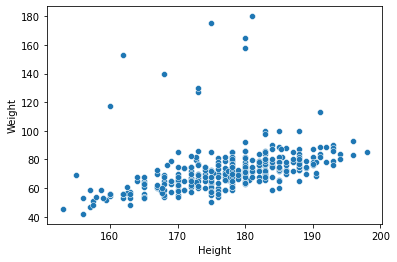

In [75]:
#Representació visual de la correlació entre alçada i pes
sns.scatterplot(x='Height', y='Weight', data=df_no_object)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

La correlació entre l'alçada i el pes es inferior a l'esperada (0,37), probablement a causa de la presencia de valors outliers (alçades i pesos introduits en el sistema imperial, en lloc del mètric). Com observem en el següent plot, si eliminem els valors de pes superiors a 115, la correlació entre les variables augmenta a quasi 0,7.

0.6900371804274974


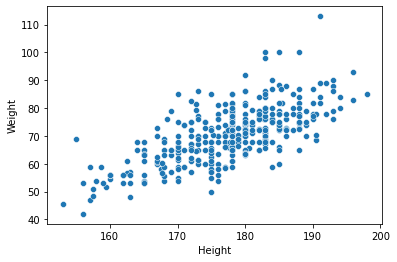

In [94]:
df_no_object_2 = df_no_object.drop(df_no_object[df_no_object.Weight > 115].index)
print(df_no_object.Height.corr(df_no_object_2.Weight))
sns.scatterplot(x='Height', y='Weight', data=df_no_object_2)
plt.show()

## Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [79]:
corr = df_no_object.corr()
corr

,Sex,Height,Weight,Arm_span,Time_climbing,Hardest_Ewbank_Grade_ever,Hardest_Ewbank_Grade_last3months,Ewbank_Grade_sent_90perc_routes,Freq_climbing_sessions_w,Avg_hours_climbing_w,Avg_hours_training_for_climbing_w,Freq_Hangboard_w,Freq_CampusBoard_w,Time_CampusBoard_h,Freq_Endurance_session_w,Freq_General_Strength_Training_w,Time_General_Strength_Training_h
Sex,1.000000,0.580212,0.252213,0.313752,0.069642,0.228840,0.215440,0.222175,-0.013429,0.023331,0.047999,0.166493,0.058058,0.001733,0.076784,0.040466,0.031989
Height,0.580212,1.000000,0.370901,0.450021,0.016430,0.075222,0.021361,0.043667,0.005602,0.041058,0.011314,0.062008,0.003831,-0.024650,0.091686,0.049191,0.028997
Weight,0.252213,0.370901,1.000000,0.180346,-0.055962,-0.043838,-0.074147,-0.062502,0.001047,-0.006787,0.037082,-0.040508,0.010884,-0.004403,0.052439,0.169523,0.224661
Arm_span,0.313752,0.450021,0.180346,1.000000,-0.034346,0.150868,0.109112,0.107334,0.035429,0.084235,0.007582,0.045861,0.049752,0.021427,0.091089,0.052536,0.028011
Time_climbing,0.069642,0.016430,-0.055962,-0.034346,1.000000,0.482290,0.351622,0.444701,0.050446,0.023568,0.228753,0.171685,0.108516,0.147481,0.065466,-0.112522,-0.113459
Hardest_Ewbank_Grade_ever,0.228840,0.075222,-0.043838,0.150868,0.482290,1.000000,0.914264,0.903087,0.252264,0.221651,0.245637,0.276132,0.159373,0.154879,0.134413,-0.072540,-0.094094
Hardest_Ewbank_Grade_last3months,0.215440,0.021361,-0.074147,0.109112,0.351622,0.914264,1.000000,0.906766,0.287951,0.221150,0.217982,0.244932,0.156553,0.158228,0.087822,-0.060561,-0.092247
Ewbank_Grade_sent_90perc_routes,0.222175,0.043667,-0.062502,0.107334,0.444701,0.903087,0.906766,1.000000,0.297162,0.223624,0.275454,0.289074,0.172961,0.183333,0.129649,-0.006503,-0.043537
Freq_climbing_sessions_w,-0.013429,0.005602,0.001047,0.035429,0.050446,0.252264,0.287951,0.297162,1.000000,0.615056,0.321169,0.254601,0.187228,0.228582,0.256710,0.131669,0.055980
Avg_hours_climbing_w,0.023331,0.041058,-0.006787,0.084235,0.023568,0.221651,0.221150,0.223624,0.615056,1.000000,0.126465,0.096918,0.057488,0.014799,0.119619,0.029045,0.010007


<AxesSubplot:>

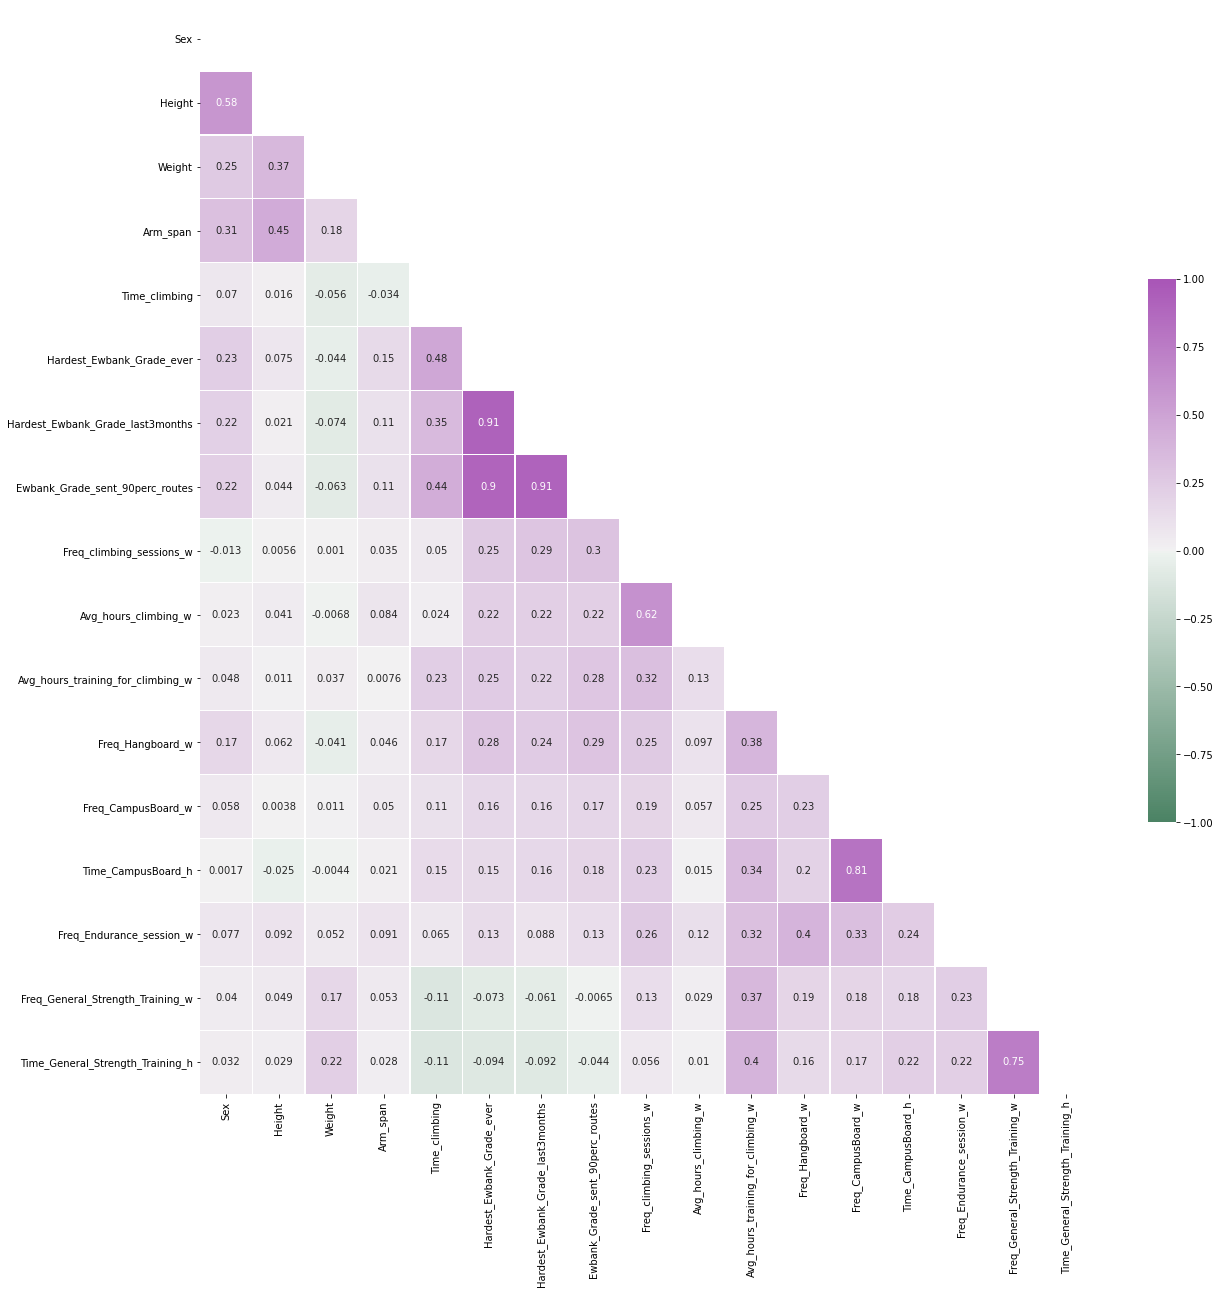

In [88]:
# Matriu de correlació
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True, linewidths=.3, cbar_kws={"shrink": .5}) 

Com observem a la matriu, la correlació entre variables és generalment baixa, excepte en els següents casos:

In [91]:
df_no_object.corr().unstack().sort_values(ascending=False).drop_duplicates()[1:6]

Hardest_Ewbank_Grade_last3months  Hardest_Ewbank_Grade_ever           0.914264
                                  Ewbank_Grade_sent_90perc_routes     0.906766
Hardest_Ewbank_Grade_ever         Ewbank_Grade_sent_90perc_routes     0.903087
Freq_CampusBoard_w                Time_CampusBoard_h                  0.809992
Time_General_Strength_Training_h  Freq_General_Strength_Training_w    0.748941
dtype: float64

Les variables del mateix grup estan, logicament, fortament correlacionades. Com més vegades a la setmana entrenem amb la Campusboard (Freq_CampusBoard_w), més hores a la setmana li'n dedicarem (Time_CampusBoard_h), per exemple. Aiximateix, el grau Ewbank que un usuari pot escalar el 90% de les vegades (Ewbank_Grade_sent_90perc_routes) està molt relacionat amb el grau més alt que ha escalat mai (Hardest_Ewbank_Grade_ever) o en els últims 3 mesos (Hardest_Ewbank_Grade_last3months).

## Exercici 4
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

**Mitjana geomètrica de Hardest_Ewbank_Grade_ever**

In [99]:
import math

math.exp(math.fsum(math.log(x) for x in df_no_object.Hardest_Ewbank_Grade_ever) / len(df_no_object.Hardest_Ewbank_Grade_ever))

24.03610443824698

In [102]:
# Comprovació
from scipy.stats.mstats import gmean

gmean(df_no_object.Hardest_Ewbank_Grade_ever)

24.03610443824697

In [118]:
# Comprovació manual
num = 1
for elem in df_no_object.Hardest_Ewbank_Grade_ever:
    num = int(elem) * num
print(num)

59602429580937476792514033659966755182197122902211072462162801468553492189332157367374999057709867548816863475694442551364568665328078639270250044335300417032784493878357576018759861983076787843272315155288054936703205461190776589936332163455038552725282832926946919937979824049472085548334592062835751793132207464741405596323869620277986944890949419152640779125334791213914521600000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


##### Hem d'importar la classe Decimal per poder generar el càlcul, ja que els nombres són molt grans

In [128]:
from decimal import Decimal
 
num ** Decimal(1/len(df_no_object.Hardest_Ewbank_Grade_ever))

Decimal('24.03610443824697554049463911')

In [130]:
# Sense classe Decimal
num ** 1./len(df_no_object.Hardest_Ewbank_Grade_ever)

OverflowError: int too large to convert to float

**Mitjana harmònica de Hardest_Ewbank_Grade_ever**

In [133]:
import statistics
statistics.harmonic_mean(df_no_object.Hardest_Ewbank_Grade_ever)

23.650368897705675

In [131]:
# Comprovació
from scipy.stats.mstats import hmean

hmean(df_no_object.Hardest_Ewbank_Grade_ever)

23.650368897705675

In [139]:
# Comprovació manual

num = 0
for elem in df_no_object.Hardest_Ewbank_Grade_ever:
    num += 1/elem

print(len(df_no_object.Hardest_Ewbank_Grade_ever)/num)

23.65036889770571
